# Pitching Fantasy MVP

### MSP 9.24.2017

Goals:


In [1]:
from IPython.display import HTML
HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.input').hide();} else { $('div.input').show(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import matplotlib as mpl



In [3]:
# imports for scraping

from bs4 import BeautifulSoup
import requests


# basic birth year reader. tables[1] has good stuff in it!
def get_birth_year(tables):

    birthdate_start = (tables[1].text).find("Birthdate:")

    birthdate_end =  (tables[1].text).find('(',birthdate_start)

    #print (tables[1].text)[birthdate_start:birthdate_end]
    birth_year = (tables[1].text)[birthdate_start:birthdate_end].split('/')[2]
    #print birth_year
    
    return birth_year





#### Compile Hitters

This cell only needs to be run in the event that player ID numbers change, or new players are added.

In [4]:

HDict = {}

f = open('data/pitcherdict.dat')

for line in f:
    #print line
    try:
        HDict[(line.split('|')[0]).strip()] = line.split('|')[1]
    except:
        pass
    
    
print('Found {} hitters by scraping teams.'.format(len(HDict.keys())))

Found 648 hitters by scraping teams.


### Grab Game Logs

Get the following quantities:
1. Hits
2. Walks
3. Strikeouts

In [13]:
#
# for an individual player
#'

itable = [u'Date', u'Team', u'Opp', u'GS', u'W', u'L', u'SV', \
          u'HLD', u'IP', u'TBF', u'H', u'R', u'ER', u'HR', \
          u'BB', u'SO', u'K/9', u'BB/9', u'HR/9', u'BABIP', u'LOB%', u'GB%', u'HR/FB', \
          u'ERA', u'FIP', u'xFIP', u'GSv2']
#             0         1        2    3     4      5     6  \
#            7      8   9       10    11      12     13  \
#            14    15    16    17          18       19      20     21      22
#           23      24      25       26




plist = ['Corey Kluber','Chris Sale','Max Scherzer','Clayton Kershaw','Kenley Jansen','Craig Kimbrel','Zack Greinke',\
        'Luis Severino','Stephen Strasburg','Carlos Carrasco','Gio Gonzalez','Robbie Ray','Alex Wood',\
        'Roberto Osuna','Ervin Santana','Justin Verlander','Jacob deGrom','Noah Syndergaard',\
        'Yu Darvish','Carlos Martinez','Chris Archer']

#plist = HDict.keys()

#for player in HDict.keys():

def obtain_players(plist):
    
    # set up dictionary
    PVals = {}

    pnum = 0

    for player in plist:
        PVals[player] = {}
        #print player,

        get_url = 'http://www.fangraphs.com/statsd.aspx?playerid='+str(HDict[player].strip())
        
        get_url = 'http://www.fangraphs.com/statsd.aspx?playerid='+str(HDict[player].strip()+'&season=2017')


        #get_url = 'http://www.fangraphs.com/statsd.aspx?playerid=11836&position=P'
        #print get_url

        r  = requests.get(get_url)

        data = r.text

        soup = BeautifulSoup(data)

        tables = soup.findAll('table')

        birth_year = float(get_birth_year(tables))

        PVals[player]['so'] = []
        PVals[player]['wh'] = []
        PVals[player]['w'] = []
        PVals[player]['er'] = []
        PVals[player]['inn'] = []


        for indx,table in enumerate(tables):

            #print indx,[th.get_text() for th in table.find("tr").find_all("th")]

            if [th.get_text() for th in table.find("tr").find_all("th")] == itable:

                #print get_url
                #if (pnum % 50) == 0:
                #    print pnum,player
                print pnum, player
                
                pnum += 1

                #print [th.get_text() for th in table.find("tr").find_all("th")]

                #print table.find_all("tr", class_="grid_multi")

                for row in table.find_all("tr")[1:]:
                    

                    if (row in table.find_all("tr", class_="grid_postseason")) |\
                        (row in table.find_all("tr", class_="grid_multi")):
                            #print 'Multi and/or Postseason:',sav[0]
                            continue


                    sav = [td.get_text() for td in row.find_all("td")]
                    
                    #print sav
                    
                    #print sav
                
                    
                    if ('Date' not in sav[0]) & ('Total' not in sav[0]) :
                        PVals[player]['so'].append(float(sav[15]))
                        PVals[player]['wh'].append(float(sav[10]) + float(sav[14]))
                        PVals[player]['w'].append(float(sav[4]))
                        PVals[player]['er'].append(float(sav[12]))
                        PVals[player]['inn'].append(float(sav[8]))


                    #if (np.sum([(x.strip() in sav[1]) for x in projections])==0) & \
                    #(np.sum([(x in sav[1]) for x in minors])==0) & \
                    #(np.sum([(x in sav[0]) for x in agg])==0): 
                    #    try:
                    #        PVals[player]['bo'].append(float(sav[0])-birth_year)
                    #        PVals[player]['pos'].append(float(sav[14])/float(sav[4]))
                    #        PVals[player]['bbr'].append(float(sav[12])/float(sav[4]))

                    #    except:
                    #        # this is janky way to skip postseason. please fix this
                    #        #print 'Skipped for postseason',sav[0],sav[1]
                    #        pass

    return PVals


PVals = obtain_players(plist)



0 Corey Kluber
1 Chris Sale
2 Max Scherzer
3 Clayton Kershaw
4 Kenley Jansen
5 Craig Kimbrel
6 Zack Greinke
7 Luis Severino
8 Stephen Strasburg
9 Carlos Carrasco
10 Gio Gonzalez
11 Robbie Ray
12 Alex Wood
13 Roberto Osuna
14 Ervin Santana
15 Justin Verlander
16 Jacob deGrom
17 Noah Syndergaard
18 Yu Darvish
19 Carlos Martinez
20 Chris Archer


Like the batting side, there aren't a whole lot of options here. And, despite my contrarian leanings, I'm going with the #1 guy on the ESPN player rater: Corey Kluber.

In [14]:
# check the 'can't hurt zone'

print('{0:20s};{1:>4s};{2:>4s};{3:>7s};{4:>5s};{5:>5s};{6:>6s}'.format(\
        'player','QS','GS','%','SO','W','INN'))

for player in PVals.keys():
    
    must_start = len(np.where( (np.array(PVals[player]['wh']) <= 5.) & (np.array(PVals[player]['er']) <= 2.) & (np.array(PVals[player]['inn']) >= 6.))[0])
    
    print('{0:20s};{1:4d};{2:4d};{3:7.2f};{4:5.0f};{5:5.0f};{6:6.0f}'.format(player,must_start,len(PVals[player]['er']),must_start/float(len(PVals[player]['er'])),np.sum(PVals[player]['so']),np.sum(PVals[player]['w']),np.sum(PVals[player]['inn'])))


player              ;  QS;  GS;      %;   SO;    W;   INN
Chris Sale          ;  10;  32;   0.31;  308;   17;   212
Carlos Martinez     ;   3;  32;   0.09;  217;   12;   202
Corey Kluber        ;  13;  29;   0.45;  265;   18;   202
Yu Darvish          ;   5;  31;   0.16;  209;   10;   184
Justin Verlander    ;   7;  33;   0.21;  219;   15;   204
Kenley Jansen       ;   0;  65;   0.00;  109;    5;    64
Noah Syndergaard    ;   2;   7;   0.29;   34;    1;    30
Carlos Carrasco     ;   7;  32;   0.22;  226;   18;   194
Luis Severino       ;  10;  31;   0.32;  230;   14;   190
Gio Gonzalez        ;   7;  32;   0.22;  188;   15;   197
Clayton Kershaw     ;   9;  27;   0.33;  202;   18;   174
Jacob deGrom        ;   8;  31;   0.26;  239;   15;   198
Roberto Osuna       ;   0;  66;   0.00;   83;    3;    61
Ervin Santana       ;   8;  33;   0.24;  167;   16;   209
Max Scherzer        ;  10;  31;   0.32;  268;   16;   199
Stephen Strasburg   ;  10;  28;   0.36;  204;   15;   174
Chris Archer  

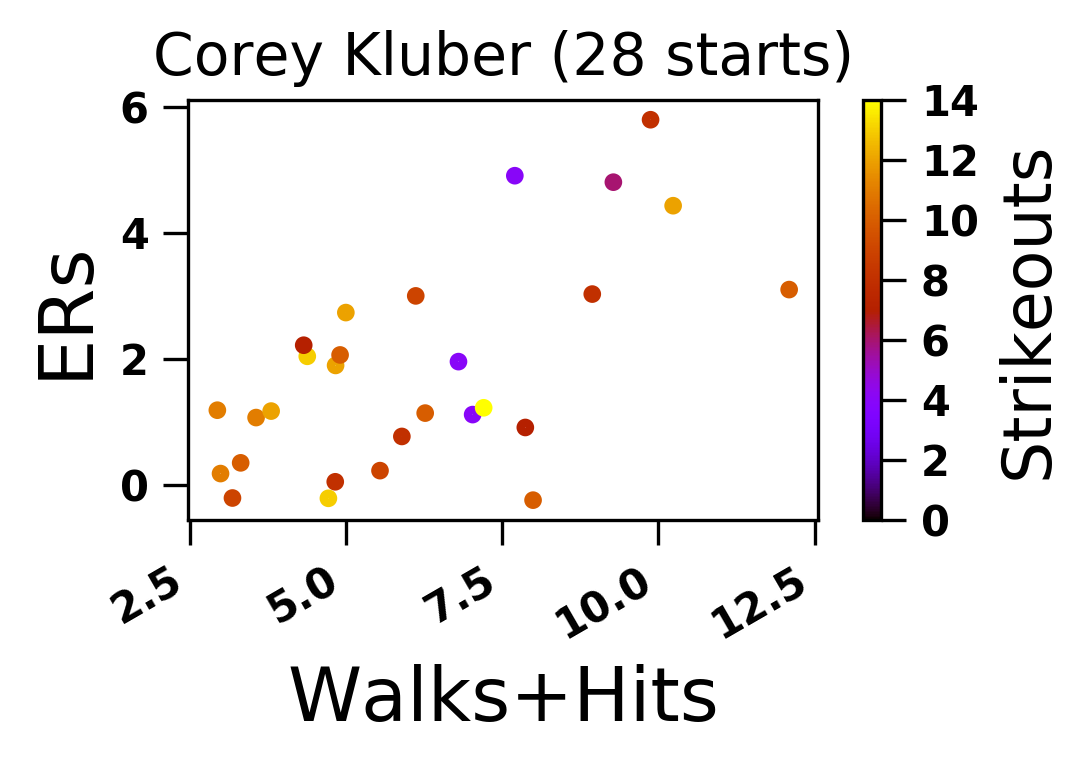

In [41]:
player = 'Corey Kluber'

fig = plt.figure(figsize=(3,2))
ax = fig.add_axes([0.15,0.15,0.7,0.7])
ax2 = fig.add_axes([0.9,0.15,0.02,0.7])

rand_offset = np.array([0.2*np.random.randn() for x in range(0,len(PVals[player]['wh']))])
rand_offset2 = np.array([0.2*np.random.randn() for x in range(0,len(PVals[player]['wh']))])

cbar = ax.scatter(np.array(PVals[player]['wh'])+rand_offset,np.array(PVals[player]['er'])+rand_offset2,lw=2.,\
                  facecolor='none',edgecolor=cm.gnuplot(PVals[player]['so']/np.max(PVals[player]['so']),1.),s=5.)

#ax.plot([0.22,0.38],[0.,0.],color='gray',linestyle='dashed')

#ax.axis([0.22,0.38,-2.5,2.5])
ax.set_xlabel('Walks+Hits',size=18)
ax.set_ylabel('ERs',size=18)
ax.set_title(player+' ('+str(len(PVals[player]['wh']))+' starts)',size=14)

cmap = mpl.cm.gnuplot
norm = mpl.colors.Normalize(vmin=0., vmax=np.max(PVals[player]['so']))
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
cb1.set_label('Strikeouts',size=16)

for label in ax.get_xticklabels(): label.set_rotation(30); label.set_horizontalalignment("right")

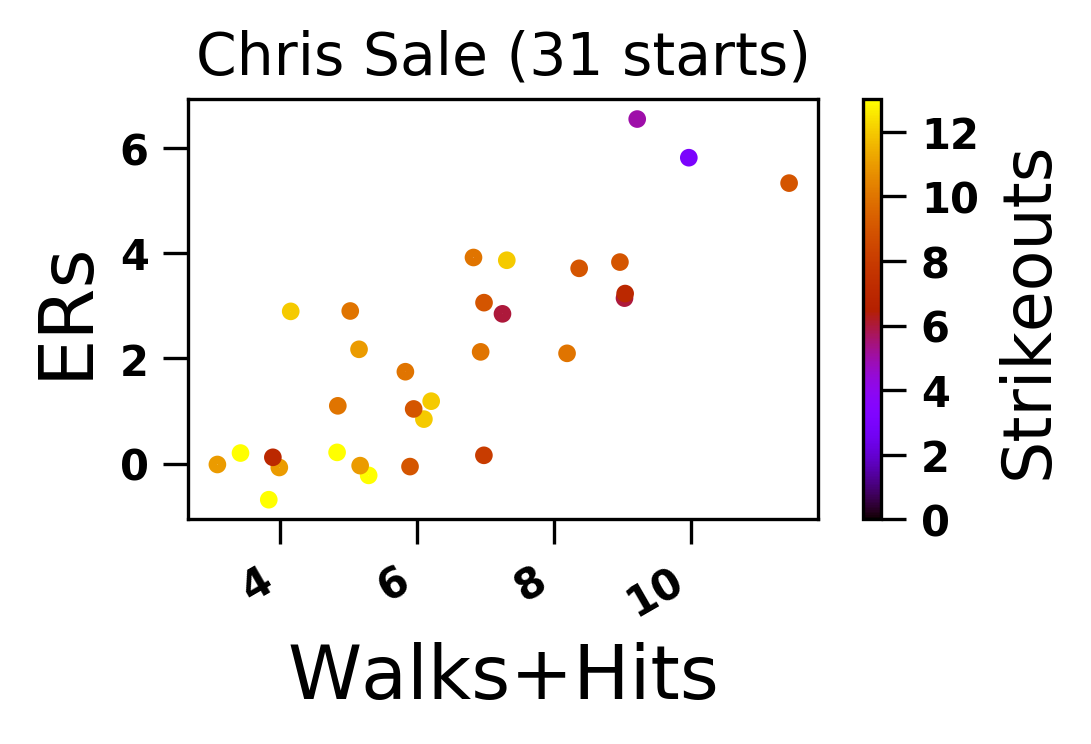

In [7]:
player = 'Chris Sale'

fig = plt.figure(figsize=(3,2))
ax = fig.add_axes([0.15,0.15,0.7,0.7])
ax2 = fig.add_axes([0.9,0.15,0.02,0.7])

rand_offset = np.array([0.2*np.random.randn() for x in range(0,len(PVals[player]['wh']))])
rand_offset2 = np.array([0.2*np.random.randn() for x in range(0,len(PVals[player]['wh']))])

cbar = ax.scatter(np.array(PVals[player]['wh'])+rand_offset,np.array(PVals[player]['er'])+rand_offset2,lw=2.,\
                  facecolor='none',edgecolor=cm.gnuplot(PVals[player]['so']/np.max(PVals[player]['so']),1.),s=5.)

#ax.plot([0.22,0.38],[0.,0.],color='gray',linestyle='dashed')

#ax.axis([0.22,0.38,-2.5,2.5])
ax.set_xlabel('Walks+Hits',size=18)
ax.set_ylabel('ERs',size=18)
ax.set_title(player+' ('+str(len(PVals[player]['wh']))+' starts)',size=14)

cmap = mpl.cm.gnuplot
norm = mpl.colors.Normalize(vmin=0., vmax=np.max(PVals[player]['so']))
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
cb1.set_label('Strikeouts',size=16)

for label in ax.get_xticklabels(): label.set_rotation(30); label.set_horizontalalignment("right")

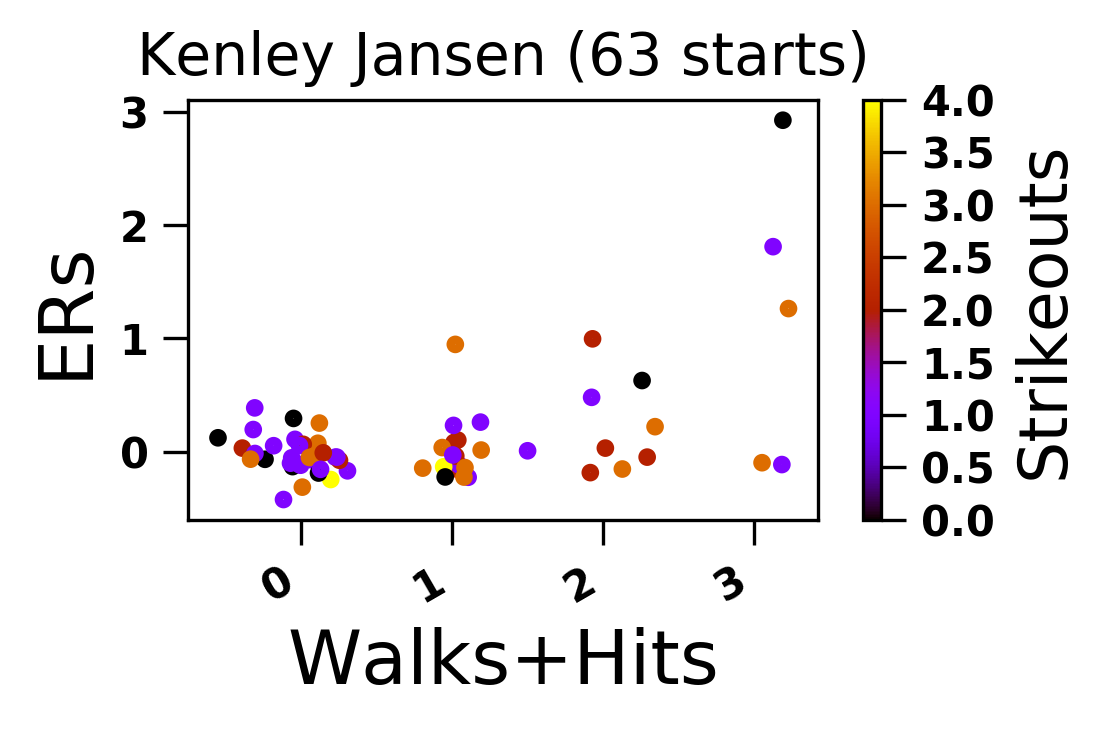

In [8]:
player = 'Kenley Jansen'

fig = plt.figure(figsize=(3,2))
ax = fig.add_axes([0.15,0.15,0.7,0.7])
ax2 = fig.add_axes([0.9,0.15,0.02,0.7])

rand_offset = np.array([0.2*np.random.randn() for x in range(0,len(PVals[player]['wh']))])
rand_offset2 = np.array([0.2*np.random.randn() for x in range(0,len(PVals[player]['wh']))])

cbar = ax.scatter(np.array(PVals[player]['wh'])+rand_offset,np.array(PVals[player]['er'])+rand_offset2,lw=2.,\
                  facecolor='none',edgecolor=cm.gnuplot(PVals[player]['so']/np.max(PVals[player]['so']),1.),s=5.)

#ax.plot([0.22,0.38],[0.,0.],color='gray',linestyle='dashed')

#ax.axis([0.22,0.38,-2.5,2.5])
ax.set_xlabel('Walks+Hits',size=18)
ax.set_ylabel('ERs',size=18)
ax.set_title(player+' ('+str(len(PVals[player]['wh']))+' starts)',size=14)

cmap = mpl.cm.gnuplot
norm = mpl.colors.Normalize(vmin=0., vmax=np.max(PVals[player]['so']))
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
cb1.set_label('Strikeouts',size=16)

for label in ax.get_xticklabels(): label.set_rotation(30); label.set_horizontalalignment("right")

The 'can't hurt you zone', with <=2 ER, <=6 W+H